In [1]:
import jax.numpy as jnp
from jax import random, grad
import matplotlib.pyplot as plt
import gaussian_process.regression as gpr
from gaussian_process.kernels import RBF

### 1D case

In [2]:
key = random.PRNGKey(0)

def func(x,noise=0.0):
    return jnp.sin(x) + noise*random.uniform(key,x.shape)

def grad_func(x,noise=0.0):
    return jnp.cos(x) + noise*random.uniform(key,x.shape)

In [3]:
bounds = jnp.array([0.0, 2*jnp.pi])

noise = 0.1

length_scale = 1.0

data_split = (9,12)
num_datapoints = 2
datagrid = jnp.linspace(*bounds,data_split[0])
data_values = func(datagrid,noise)
derivative_grid = jnp.linspace(*bounds,data_split[1])
derivative_values = grad_func(derivative_grid,noise)

X_data = jnp.concatenate((datagrid,derivative_grid)).reshape(-1,1)
Y_data = jnp.concatenate((data_values,derivative_values)).reshape(-1,1)

batches = 3
n_runs = 10

num_gridpoints = 101
grid = jnp.linspace(*bounds,num_gridpoints)

kernel = RBF()

In [4]:
model = gpr.Bootstrapper(X_data, Y_data, data_split, X_predict=grid.reshape(-1,1), noise_var=noise**2, batches=batches, n_runs=n_runs)

In [5]:
model.run()

In [6]:
means, stds = model.get_prediction()

In [7]:
means = jnp.array(means)
stds = jnp.array(stds)

avg_means = jnp.mean(means,axis=0).reshape(-1)
avg_stds = jnp.sqrt(jnp.mean(stds**2,axis=0)).reshape(-1)

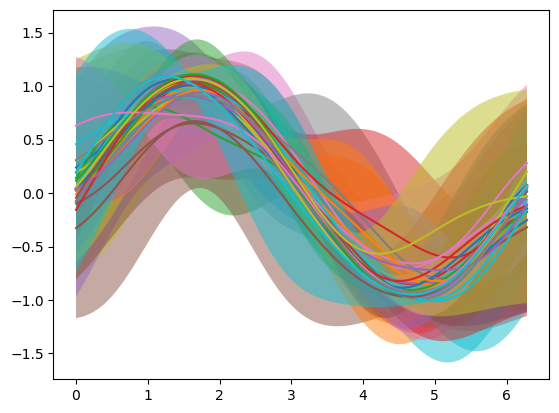

In [8]:
for mean, std in zip(means,stds):
    mean = mean.reshape(-1)
    std = std.reshape(-1)
    plt.plot(grid,mean)
    plt.fill_between(grid,mean-std,mean+std,alpha=0.5)

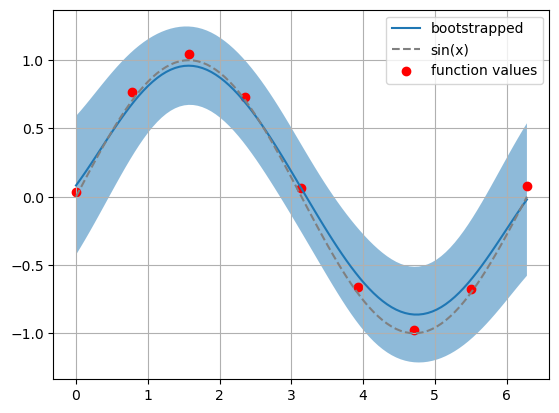

In [9]:
plt.plot(grid,avg_means,label="bootstrapped")
plt.fill_between(grid,avg_means-avg_stds,avg_means+avg_stds,alpha=0.5)
plt.plot(grid,func(grid),color="grey",ls="--",label="sin(x)")
plt.scatter(datagrid,data_values,color="r",label="function values")
plt.grid()
plt.legend()